In [249]:
print("hello")

hello


In [250]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [251]:
img_path="C:\\Inception BD\\Computer Vision\\Computer_Vision\\day3\\resources\\image.png"

In [252]:
zebra=mpimg.imread(img_path)

In [253]:
zebra

array([[[0.5411765 , 0.70980394, 0.84313726],
        [0.6       , 0.76862746, 0.9019608 ],
        [0.59607846, 0.7647059 , 0.8980392 ],
        ...,
        [0.6       , 0.76862746, 0.90588236],
        [0.6       , 0.76862746, 0.90588236],
        [0.6       , 0.76862746, 0.90588236]],

       [[0.54901963, 0.7176471 , 0.8509804 ],
        [0.6039216 , 0.77254903, 0.90588236],
        [0.59607846, 0.7647059 , 0.8980392 ],
        ...,
        [0.6       , 0.76862746, 0.90588236],
        [0.6       , 0.76862746, 0.90588236],
        [0.6       , 0.76862746, 0.90588236]],

       [[0.5568628 , 0.7254902 , 0.85882354],
        [0.6117647 , 0.78039217, 0.9137255 ],
        [0.59607846, 0.7647059 , 0.8980392 ],
        ...,
        [0.6       , 0.76862746, 0.90588236],
        [0.6       , 0.76862746, 0.90588236],
        [0.6       , 0.76862746, 0.90588236]],

       ...,

       [[0.50980395, 0.58431375, 0.27450982],
        [0.54901963, 0.6       , 0.31764707],
        [0.5411765 , 0

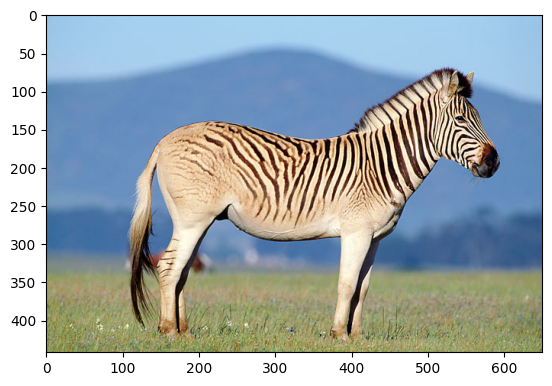

In [254]:
plt.imshow(zebra)

In [255]:
zebra.shape

(442, 650, 3)

## using cv2

In [256]:
cv2_zebra=cv2.imread(img_path)

In [257]:
cv2_zebra

array([[[215, 181, 138],
        [230, 196, 153],
        [229, 195, 152],
        ...,
        [231, 196, 153],
        [231, 196, 153],
        [231, 196, 153]],

       [[217, 183, 140],
        [231, 197, 154],
        [229, 195, 152],
        ...,
        [231, 196, 153],
        [231, 196, 153],
        [231, 196, 153]],

       [[219, 185, 142],
        [233, 199, 156],
        [229, 195, 152],
        ...,
        [231, 196, 153],
        [231, 196, 153],
        [231, 196, 153]],

       ...,

       [[ 70, 149, 130],
        [ 81, 153, 140],
        [ 82, 147, 138],
        ...,
        [ 10, 129, 108],
        [ 46,  98,  74],
        [ 78, 130, 106]],

       [[ 71, 155, 127],
        [ 74, 154, 131],
        [ 81, 157, 139],
        ...,
        [ 58, 144, 126],
        [ 72, 128, 133],
        [ 66, 122, 127]],

       [[ 65, 149, 121],
        [ 65, 145, 122],
        [ 73, 149, 131],
        ...,
        [ 76, 145, 130],
        [ 71, 127, 132],
        [ 83, 139, 144]]

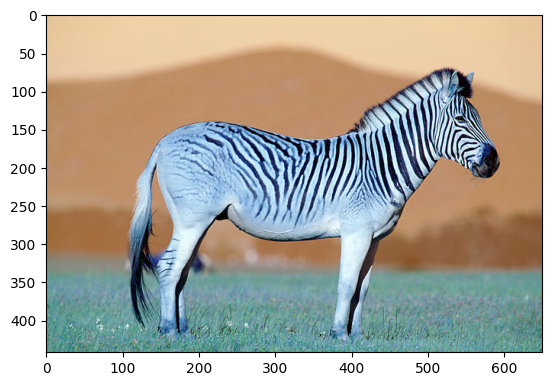

In [258]:
plt.imshow(cv2_zebra) # it is difference with real image, beacause cv2 represent image in BGR

In [259]:
cv2_zebra.shape

(442, 650, 3)

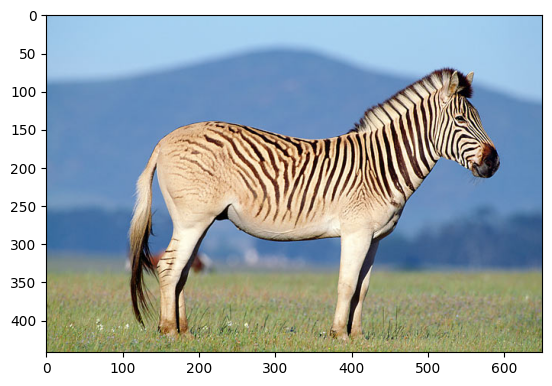

In [260]:
# back to original image

cv2_BGR_RGB=cv2.cvtColor(cv2_zebra,cv2.COLOR_BGR2RGB)
plt.imshow(cv2_BGR_RGB)

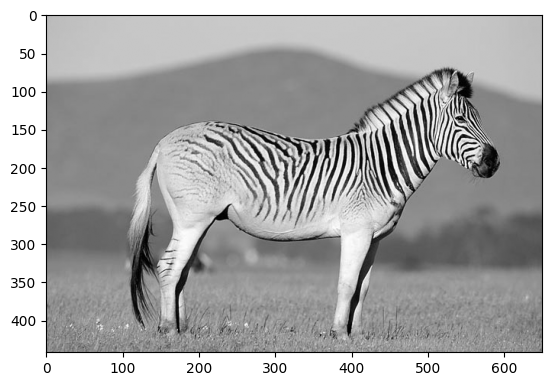

In [261]:
# coonvert into gray scale

cv2_grayScale_img=cv2.cvtColor(cv2_zebra,cv2.COLOR_BGR2GRAY)
#plt.imshow(cv2_grayScale_img)
plt.imshow(cv2_grayScale_img, cmap="gray")

In [262]:
cv2_grayScale_img.shape

(442, 650)

In [263]:
cv2_grayScale_img.min()

np.uint8(0)

In [264]:
cv2_grayScale_img.max()

np.uint8(255)

## Understanding composition of colored images

In [265]:
def visualize_RGB_channel(imgArray=None, figsize=(10, 7)):

    # Convert BGR to RGB for visualization
    img_rgb = cv2.cvtColor(imgArray, cv2.COLOR_BGR2RGB)

    # Split the RGB image
    R, G, B = cv2.split(img_rgb)

    # Zero channel
    Z = np.zeros(R.shape, dtype=R.dtype)

    fig, ax = plt.subplots(2, 2, figsize=figsize)
    [axi.set_axis_off() for axi in ax.ravel()]

    ax[0, 0].set_title("Original Image")
    ax[0, 0].imshow(img_rgb)

    ax[0, 1].set_title("Red Ch Image")
    ax[0, 1].imshow(cv2.merge((R, Z, Z)))

    ax[1, 0].set_title("Green Ch Image")
    ax[1, 0].imshow(cv2.merge((Z, G, Z)))

    ax[1, 1].set_title("Blue Ch Image")
    ax[1, 1].imshow(cv2.merge((Z, Z, B)))


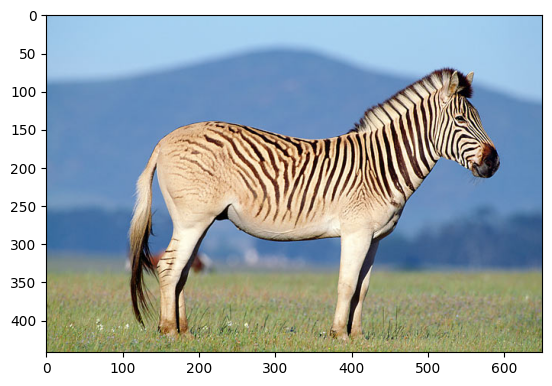

In [266]:
plt.imshow(cv2_BGR_RGB)

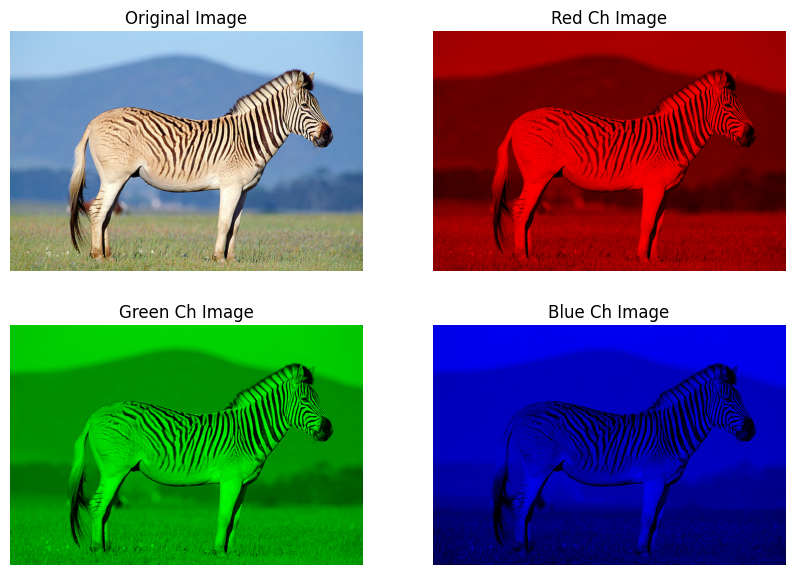

In [267]:
visualize_RGB_channel(imgArray=cv2_zebra)

In [268]:
random_color_img=np.random.randint(0,255,(6,6,3), dtype=np.uint8) # 0 to 255 range color generated and 6/6 matrix with 3 chanel

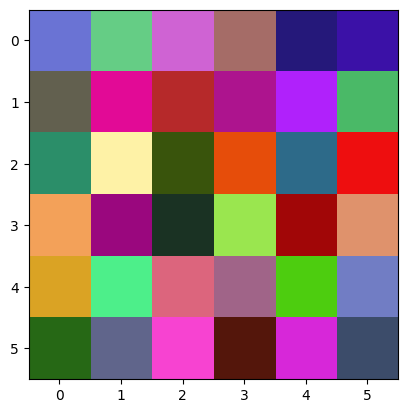

In [269]:
plt.imshow(random_color_img)

In [270]:
random_color_img.shape

(6, 6, 3)

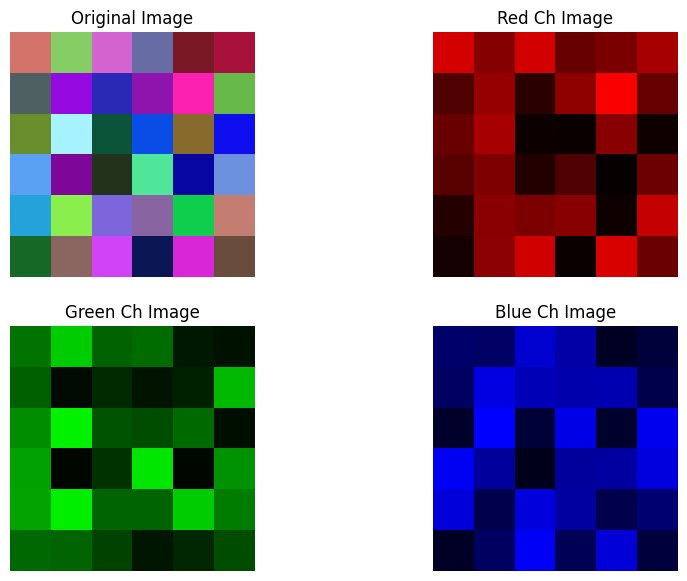

In [271]:
visualize_RGB_channel(imgArray=random_color_img)

## Understanding filter

In [272]:
vertical_sobel=np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]
                         ])
print("vertical sobel",vertical_sobel)

vertical sobel [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [273]:
horizontal_sobel=vertical_sobel.T
print("transpose",horizontal_sobel)

transpose [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [274]:
example1 = [
    [0,0,0,255,255,255,255,0,0,0],
    [0,0,0,255,255,255,255,0,0,0],
    [0,0,0,255,255,255,255,0,0,0],
    [0,0,0,255,255,255,255,255,255,255],
    [0,0,0,255,255,255,255,255,255,255],
    [0,0,0,255,255,255,255,255,255,255],
    [0,0,0,255,255,255,255,255,255,255],
    [0,0,0,255,255,255,255,255,255,255],
    [0,0,0,255,255,255,255,255,255,255],
    [0,0,0,255,255,255,255,0,0,0]
]

example1 = np.array(example1, dtype=np.uint8)


In [275]:
example1

array([[  0,   0,   0, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0]], dtype=uint8)

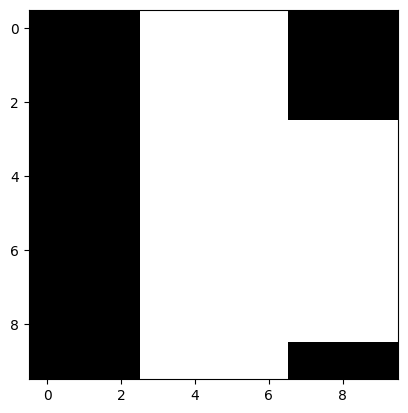

In [276]:
plt.imshow(example1, cmap="gray")

now apply sobel vertical and horizontal in example1

In [277]:
def simple_conv(imgFilter=None, picture=None):
    # extract the shape of the image
    p_row, p_col = picture.shape

    k = imgFilter.shape[0]   # k = 3

    temp = list()

    stride = 1

    # resultant image size
    final_cols = (p_col - k) // stride + 1
    final_rows = (p_row - k) // stride + 1

    # take vertically down stride across row by row
    for v_stride in range(final_rows):
        # take horizontal right stride across col by col
        for h_stride in range(final_cols):
            target_area_of_pic = picture[
                v_stride : v_stride + k,
                h_stride : h_stride + k
            ]

            z = sum(sum(imgFilter * target_area_of_pic))
            temp.append(z)

    resultant_image = np.array(temp).reshape(final_rows, final_cols)
    return resultant_image


In [278]:
vertical_sobel_result=simple_conv(picture=example1,imgFilter=vertical_sobel)

In [279]:
vertical_sobel_result

array([[    0, -1020, -1020,     0,     0,  1020,  1020,     0],
       [    0, -1020, -1020,     0,     0,   765,   765,     0],
       [    0, -1020, -1020,     0,     0,   255,   255,     0],
       [    0, -1020, -1020,     0,     0,     0,     0,     0],
       [    0, -1020, -1020,     0,     0,     0,     0,     0],
       [    0, -1020, -1020,     0,     0,     0,     0,     0],
       [    0, -1020, -1020,     0,     0,     0,     0,     0],
       [    0, -1020, -1020,     0,     0,   255,   255,     0]])

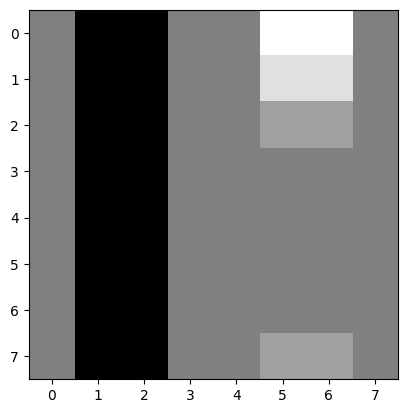

In [280]:
plt.imshow(vertical_sobel_result,cmap="gray")

In [281]:
horizontal_sobel_result=simple_conv(picture=example1, imgFilter=horizontal_sobel)

In [282]:
horizontal_sobel_result

array([[    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,  -255,  -765, -1020],
       [    0,     0,     0,     0,     0,  -255,  -765, -1020],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,   255,   765,  1020]])

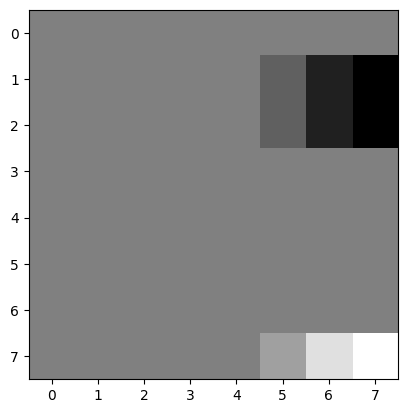

In [283]:
plt.imshow(horizontal_sobel_result,cmap="gray")

## now apply sobel vertical and horizontal in zebra gray scale image

vertical line visualization

In [284]:
zebra_sobel_vertical=simple_conv(picture=cv2_grayScale_img,imgFilter=vertical_sobel)

In [285]:
zebra_sobel_vertical

array([[-48,   1, -23, ...,   4,   0,   0],
       [-40,  11, -16, ...,   4,   0,   0],
       [-33,  19, -10, ...,   4,   0,   0],
       ...,
       [-37, -65, -77, ...,  47, 139,   9],
       [-23, -44, -50, ..., 114, 145,  -7],
       [-19, -62, -40, ...,  66,  76,  15]], shape=(440, 648))

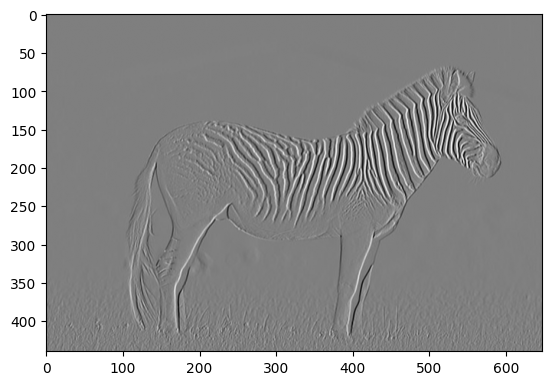

In [286]:
plt.imshow(zebra_sobel_vertical,cmap="gray")

horizontal line visualization

In [287]:
zebra_sobel_horizontal=simple_conv(picture=cv2_grayScale_img,imgFilter=horizontal_sobel)

In [288]:
zebra_sobel_horizontal

array([[ -10,   -1,    7, ...,    0,    0,    0],
       [ -10,   -1,    8, ...,    0,    0,    0],
       [  -5,    1,    6, ...,    0,    0,    0],
       ...,
       [ -55,  -27,    3, ...,   49,  143,  143],
       [ -43,  -36,  -18, ...,   -2,  -23,  -33],
       [  29,    8,  -18, ...,   18,  -78, -115]], shape=(440, 648))

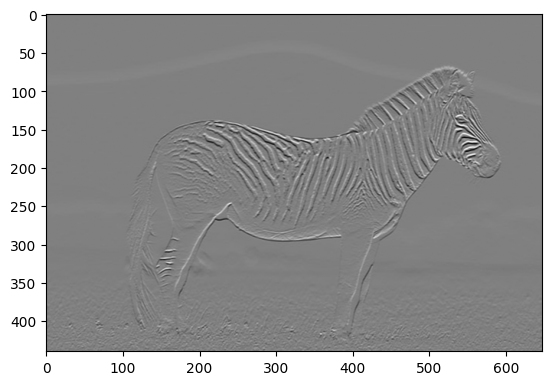

In [289]:
plt.imshow(zebra_sobel_horizontal, cmap="gray")